# LargeScaleNLP: An Introduction

There are 3 __prominent__ reasons for the revolution that we witnessed in NLP starting 2017:
1. The seminal __"Attention is all you need"__ paper, which introduced Transformer architecture.
2. Availability of large models, pre-trained on generic texts which can be finetuned (transfer-learning) to specific task at hand.
3. Model Hubs like HuggingFace which host thousands of state-of-the art models which can be downloaded and used.

In short the 3 key ideas that fuelled NLP growth are:
__Attention Mechanism__, __Transfer Learning__ and __Scaling__.


In [1]:
from IPython.display import Image, display

## Timeline of major developments

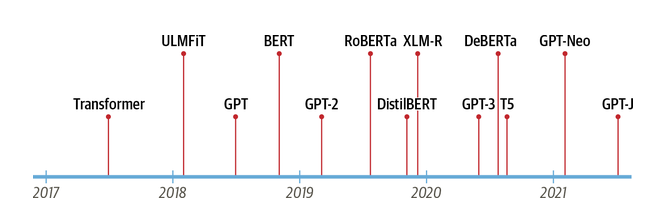

In [2]:
display(Image(filename='./Pics_01_TransformerTimeline.png', width=600, height=200))

__ULMFiT__ (Universal Language Model Fine-tuning for Text Classification: https://arxiv.org/abs/1801.06146) needs a special mention as it catalyzed the concept of __Tranfer-Learning__ in NLP. It showed that training long short-term memory (LSTM) networks on a very large and diverse corpus could produce state-of-the-art text classifiers with little labeled data.

 __Tranfer-Learning__ in NLP, as pioneered by __ULMFiT__ involves 3 main steps:
 1. __Pre-training__: In NLP pre-training is done via __Language Modelling Task__ (which states simply is predicting the next token given previous tokens). Pre-training can be done in self-supervised fashion (on a huge text corpus like Wikipedia)
 2. __Domain Adaption__: We take the pre-trained model and adapt it to the domain of our final task. Here also the task is __Language Modelling__ only, just that the dataset is Domain specific (like IMDB).
 3. __Fine-Tuning__: In this step, the language model is fine-tuned with a classification layer for the target task:

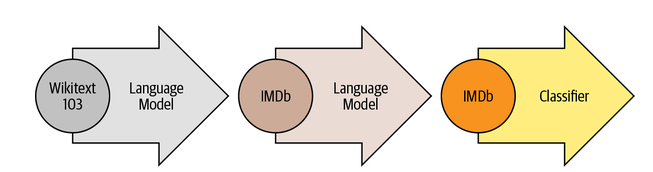

In [3]:
display(Image(filename='./Pics_02_TransferLearningInNLP.png', width=500, height=100))

## HuggingFace Ecosystem (Hub and Libraries):

The HuggingFace Ecosystem provides 2 main things to NLP practioners:

1. __HuggingFace &#x1F917; Hub__: For pre-trained __models__ (https://huggingface.co/models), __datasets__ (https://huggingface.co/datasets), __metrics__ (https://huggingface.co/metrics) and __docs__ (https://huggingface.co/docs). The hub has a few more things like __Spaces__ (to host AI apps) and __Posts__ (for posting articles, questions etc. to the community).<br><br>

2. __4 NLP Libraries__ for using/fine-tuning the models and datasets hosted in the Hub:

    1. HuggingFace &#x1F917; __Transformer__:
        - It provides a __standardized interface__ to a wide range of transformer models on the hub as well as code and tools to adapt these models to new use cases. 
        - It aslo provides task-specific __heads__ to easily fine-tune transformers on downstream tasks such as text classification, named entity recognition, and question answering.
    
    2. HuggingFace &#x1F917; __Dataset__: 
        - It offers similar functionality for data processing as Pandas but is designed from the ground up for tackling large datasets.
        - It provides a __standard interface__ for datasets available on the Hub.
        - It also provides smart caching and avoids RAM limitations by leveraging a special mechanism called __memory mapping__ that stores the contents of a file in virtual memory and enables multiple processes to modify a file more efficiently.
        
    3. HuggingFace &#x1F917; __Tokenizers__:
        - It provides many tokenization strategies. 
        - It also takes care of all the pre- and postprocessing steps, such as normalizing the inputs and transforming the model outputs to the required format. 
        - The interface for loading tokenizers is same as loading pretrained model weights with Transformers.
    
    4. HuggingFace &#x1F917; __Accelerate__: 
    
        - It gives us full control over the training loop and allows us to train large-scale transformers entirely from scratch.


## Exploring the Transformer Library of HuggingFace

__Transformer Library__ allows to interact with the library at various levels of abstraction. The most basic object is __*pipeline()* function__, which abstracts away all the steps needed to convert raw text into a set of predictions from a __fine-tuned model__.

In [4]:
from transformers import pipeline
import pandas as pd

### NER (Named Entity Recognition)

In [5]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure
from your online store in Germany. Unfortunately, when I opened the package,
I discovered to my horror that I had been sent an action figure of Megatron
instead! As a lifelong enemy of the Decepticons, I hope you can understand my
dilemma. To resolve the issue, I demand an exchange of Megatron for the
Optimus Prime figure I ordered. Enclosed are copies of my records concerning
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

ner_tagger = pipeline("ner", aggregation_strategy="simple")
outputs = ner_tagger(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


,entity_group,score,word,start,end
0,ORG,0.879010,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556569,Mega,208,212
4,PER,0.590257,##tron,212,216
5,ORG,0.669692,Decept,253,259
6,MISC,0.498350,##icons,259,264
7,MISC,0.775361,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


By default, this pipeline() selects a particular pretrained model that has been fine-tuned for "__ner__" task. We can also choose a __particular__ model from the Hub to use in a pipeline for a specific task — say, __Question Answering__.

### Question Answering

In [6]:
reader = pipeline("question-answering", model = "deepset/roberta-base-squad2")
question = "What does the customer want?"
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

Device set to use cuda:0


,score,start,end,answer
0,0.074738,335,358,an exchange of Megatron


Some of the currently available pipelines are:
- feature-extraction (get the vector representation of a text)
- fill-mask
- ner (named entity recognition)
- question-answering
- sentiment-analysis
- summarization
- text-generation
- translation
- zero-shot-classification